In [122]:


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [123]:
violin1 = pd.read_csv("violin.csv")
result = violin1

In [126]:
# # UNCOMMENT IF YOU SPLIT THE TESTING INTO MULTIPLE BATCHES
# result = pd.concat([violin1, violin2, violin3], ignore_index=True, sort=False)

In [127]:
# rename policy iteration
result['algorithm'] = result.algorithm.astype('object')
a = result[result["algorithm"]== "Policy iteration"]
a.loc[:,"algorithm"] = "Policy\niteration"
result[result["algorithm"]== "Policy iteration"] = a
result['algorithm'] = result.algorithm.astype('category')
result.head()

C:\Users\tmiha\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Unnamed: 0,grid,algorithm,measurement,performance
0,0,death.grid,SARSA,cleanliness,87.5
1,1,death.grid,SARSA,efficiency,100.0
2,2,death.grid,Q-learning,cleanliness,87.5
3,3,death.grid,Q-learning,efficiency,100.0
4,4,death.grid,SARSA,cleanliness,87.5


In [128]:
# rename value itteration
result['algorithm'] = result.algorithm.astype('object')
a = result[result["algorithm"]== "Value iteration"]
a.loc[:,"algorithm"] = "Value\niteration"
result[result["algorithm"]== "Value iteration"] = a
result['algorithm'] = result.algorithm.astype('category')
result.head()

C:\Users\tmiha\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Unnamed: 0,grid,algorithm,measurement,performance
0,0,death.grid,SARSA,cleanliness,87.5
1,1,death.grid,SARSA,efficiency,100.0
2,2,death.grid,Q-learning,cleanliness,87.5
3,3,death.grid,Q-learning,efficiency,100.0
4,4,death.grid,SARSA,cleanliness,87.5


In [129]:
# Remove death grid
result['grid'] = result.grid.astype('object')
result = result[result["grid"] != "death.grid"]
result['grid'] = result.grid.astype('category')

In [131]:
# make sure results are the correct Dtype
df=result
df['grid'] = df.grid.astype('category')
df['algorithm'] = df.algorithm.astype('category')
df['measurement'] = df.measurement.astype('category')
df['performance'] = df.performance.astype('float64')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 40 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   300 non-null    int64   
 1   grid         300 non-null    category
 2   algorithm    300 non-null    category
 3   measurement  300 non-null    category
 4   performance  300 non-null    float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 8.4 KB


In [133]:
df.head()

,Unnamed: 0,grid,algorithm,measurement,performance
40,40,house.grid,SARSA,cleanliness,100.000000
41,41,house.grid,SARSA,efficiency,59.537572
42,42,house.grid,Q-learning,cleanliness,68.627451
43,43,house.grid,Q-learning,efficiency,43.096234
44,44,house.grid,SARSA,cleanliness,100.000000


C:\Users\tmiha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tmiha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


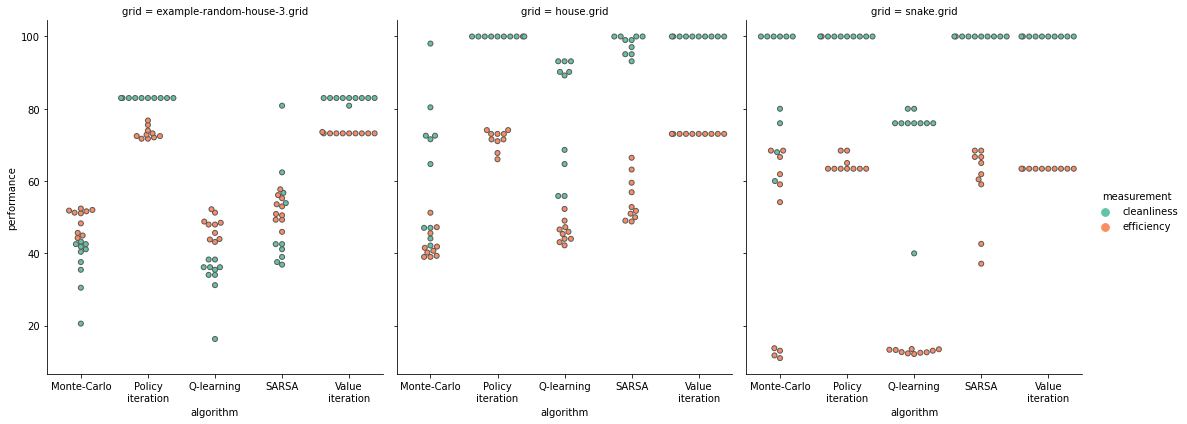

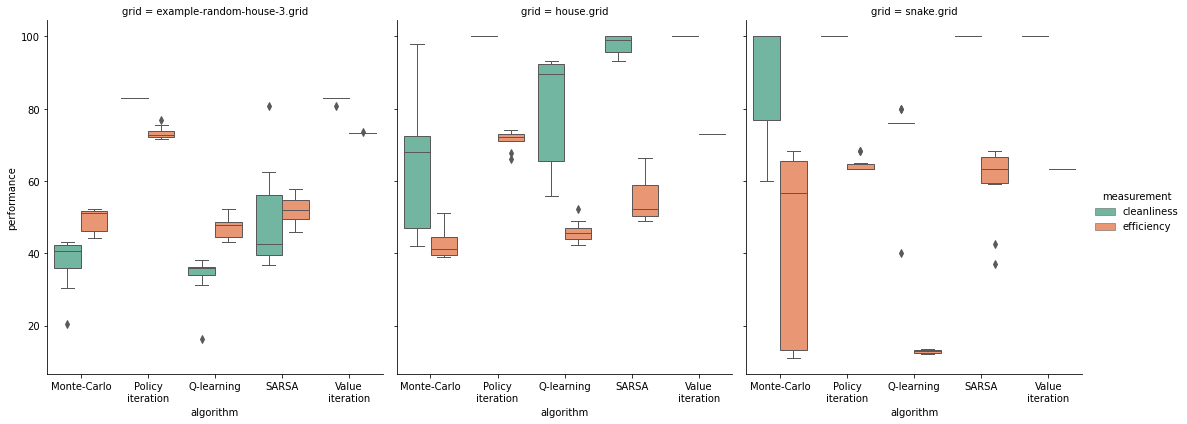

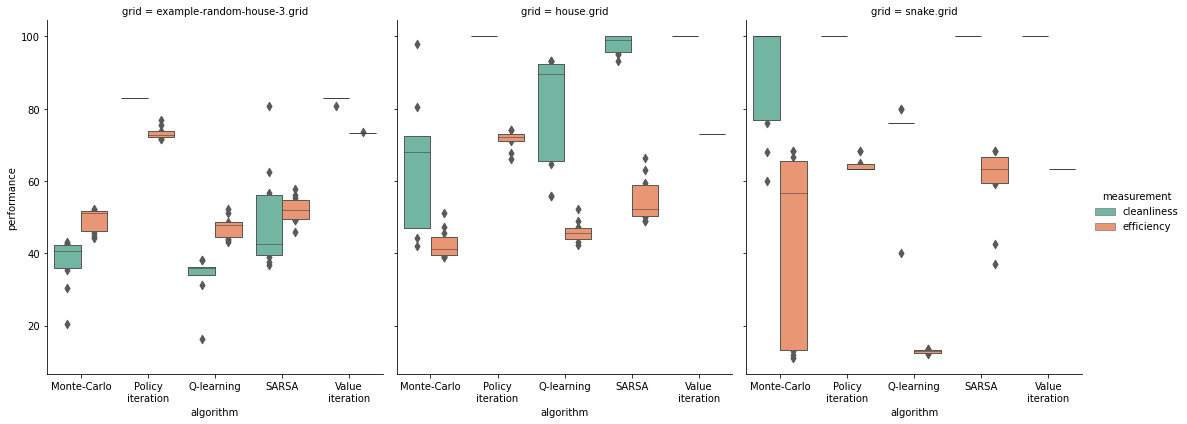

In [134]:
# GENERATE BOXPLOTS
ax = sns.catplot(x="algorithm", y="performance",
                hue="measurement", col="grid",
                data=df, kind="swarm", linewidth=1,palette="Set2",
                height=6, aspect=.85);
sns.catplot(x="algorithm", y="performance",
                hue="measurement", col="grid",
                data=df, kind="box", linewidth=1,palette="Set2",
                height=6, aspect=.85);
plt.savefig('foo.png')
g = sns.catplot(x="algorithm", y="performance", 
                hue="measurement", col="grid",
                data=df, kind="boxen", linewidth=1,palette="Set2",
                height=6, aspect=.85);
plt.show()